In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the Credit Card data

CCData = pd.read_csv(r"creditcard.csv", header=0)

# Copy to back-up file

CCData_bk = CCData.copy()

# Display first 5 values

CCData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display the Credit Card data information

CCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

CreditCard_count = CCData.Class.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total CC Trans:', len(CCData))

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1
Total CC Trans: 284807


In [5]:
# Delect variable which are influencing the target variable

del CCData['Time']

# Display first 5 records

CCData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in CCData.columns:
    if col != 'Class':
        IndepVar.append(col)

TargetVar = 'Class'

x = CCData[IndepVar]
y = CCData[TargetVar]

In [7]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [8]:
# Use Standardization to remove the mean and scale to unit variance

from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()

x_train['Amount'] = SScaler.fit_transform(x_train['Amount'].values.reshape(-1, 1))
x_test['Amount'] = SScaler.fit_transform(x_test['Amount'].values.reshape(-1, 1))

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Over Sampling 

In [9]:
# Random Over Sampling can be implemented by using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(568630, 29)
(568630,)


In [10]:
y_over = pd.DataFrame(y_over)
y_over.value_counts()

Class
0        284315
1        284315
dtype: int64

# Under Sampling

In [11]:
# Random Under Sampling to balance the class distribution

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

x_under, y_under = undersample.fit_resample(x, y)

print(x_under.shape)
print(y_under.shape)

(984, 29)
(984,)


In [12]:
y_under.value_counts()

0    492
1    492
Name: Class, dtype: int64

# Combining Random Oversampling and Undersampling

In [13]:
# Combining Random Oversampling and Undersampling 

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define oversampling strategy

over = RandomOverSampler(sampling_strategy=0.35)

# fit and apply the transform

x1, y1 = over.fit_resample(x, y)

print(x1.shape)
print(y1.shape)

# define undersampling strategy

under = RandomUnderSampler(sampling_strategy=0.50)

# fit and apply the transform

x2, y2 = under.fit_resample(x1, y1)

print(x2.shape)
print(y2.shape)

(383825, 29)
(383825,)
(298530, 29)
(298530,)


In [14]:
y1.value_counts()

0    284315
1     99510
Name: Class, dtype: int64

In [15]:
y2.value_counts()

0    199020
1     99510
Name: Class, dtype: int64

In [17]:
# Load the Results dataset

CSResults = pd.read_csv(r"E:\SDP-2\HTResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Compare Classification Algorithms - Under Sampling 

In [18]:
# Random Under Sampling to balance the class distribution

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

x_under, y_under = undersample.fit_resample(x, y)

print(x_under.shape)
print(y_under.shape)

(984, 29)
(984,)


In [19]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

xu_train, xu_test, yu_train, yu_test = train_test_split(x_under, y_under, test_size = 0.20, random_state = 42)

# Display the shape 

xu_train.shape, xu_test.shape, yu_train.shape, yu_test.shape

((787, 29), (197, 29), (787,), (197,))

In [20]:
# Use Standardization to remove the mean and scale to unit variance

from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()

xu_train['Amount'] = SScaler.fit_transform(xu_train['Amount'].values.reshape(-1, 1))
xu_test['Amount'] = SScaler.fit_transform(xu_test['Amount'].values.reshape(-1, 1))

xu_train = pd.DataFrame(xu_train)
xu_test = pd.DataFrame(xu_test)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[87 11]
 [ 3 96]]
Outcome values : 
 87 11 3 96
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.89      0.93        98
           0       0.90      0.97      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Accuracy : 92.9 %
Precision : 96.7 %
Recall : 88.8 %
F1 Score : 0.926
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 92.9 %
roc_auc_score: 0.929


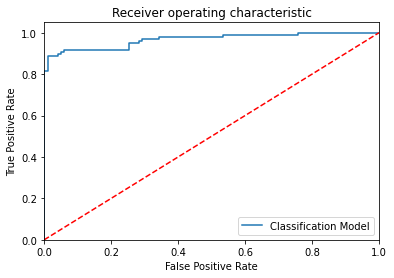

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[91  7]
 [10 89]]
Outcome values : 
 91 7 10 89
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.93      0.91        98
           0       0.93      0.90      0.91        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

Accuracy : 91.4 %
Precision : 90.1 %
Recall : 92.9 %
F1 Score : 0.915
Specificity or True Negative Rate : 89.9 %
Balanced Accuracy : 91.4 %
roc_auc_score: 0.914


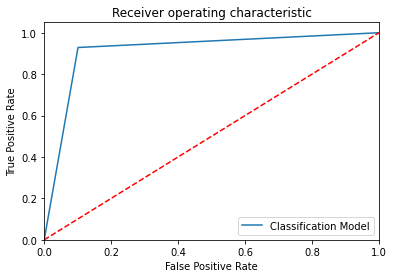

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[88 10]
 [ 2 97]]
Outcome values : 
 88 10 2 97
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.90      0.94        98
           0       0.91      0.98      0.94        99

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy : 93.9 %
Precision : 97.8 %
Recall : 89.8 %
F1 Score : 0.936
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 93.9 %
roc_auc_score: 0.939


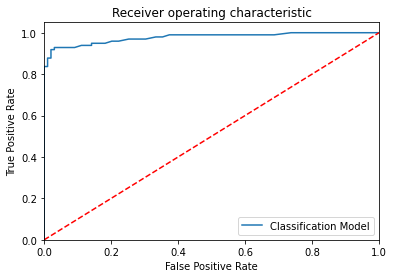

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[86 12]
 [ 1 98]]
Outcome values : 
 86 12 1 98
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93        98
           0       0.89      0.99      0.94        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

Accuracy : 93.4 %
Precision : 98.9 %
Recall : 87.8 %
F1 Score : 0.93
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 93.4 %
roc_auc_score: 0.934


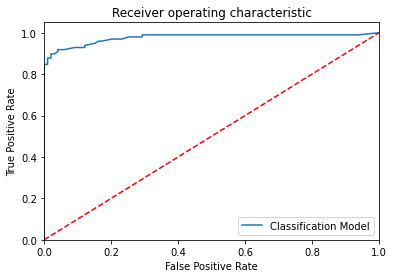

-----------------------------------------------------------------------------------------------------


In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
    
    # Assign values
    
    x_train = xu_train
    x_test = xu_test
    y_train = yu_train
    y_test = yu_test
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [22]:
CSResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),87,11,3,96,0.929,0.967,0.888,0.926,0.97,MCC,0.928726,0.929
1,DecisionTreeClassifier(),91,7,10,89,0.914,0.901,0.929,0.915,0.899,MCC,0.913781,0.914
2,"(DecisionTreeClassifier(max_features='sqrt', r...",88,10,2,97,0.939,0.978,0.898,0.936,0.98,MCC,0.938879,0.939
3,"(ExtraTreeClassifier(random_state=1571238915),...",86,12,1,98,0.934,0.989,0.878,0.93,0.99,MCC,0.933725,0.934
